<a href="https://colab.research.google.com/github/rrizwan98/Play_Store_Reviews_Classification/blob/main/play_store_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from zipfile import ZipFile
file_name='/content/drive/My Drive/pLay store dataset.zip'
with ZipFile (file_name, 'r' )as zip:
  zip.extractall()
  print('raza')

raza


In [ ]:
# Import Libraryies
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model, Sequential
from keras import layers
from keras import Input
from keras.models import Model
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Load the data
data1=pd.read_csv('/content/Google-Playstore-Full.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,3,11,12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
data1.head()

,App Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating,Last Updated,Minimum Version,Latest Version,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,DoorDash - Food Delivery,FOOD_AND_DRINK,4.548561573,305034,"5,000,000+",Varies with device,0,Everyone,"March 29, 2019",Varies with device,Varies with device,NaN,NaN,NaN,NaN
1,TripAdvisor Hotels Flights Restaurants Attract...,TRAVEL_AND_LOCAL,4.400671482,1.20792e+06,"100,000,000+",Varies with device,0,Everyone,"March 29, 2019",Varies with device,Varies with device,NaN,NaN,NaN,NaN
2,Peapod,SHOPPING,3.656329393,1967,"100,000+",1.4M,0,Everyone,"September 20, 2018",5.0 and up,2.2.0,NaN,NaN,NaN,NaN
3,foodpanda - Local Food Delivery,FOOD_AND_DRINK,4.107232571,389154,"10,000,000+",16M,0,Everyone,"March 22, 2019",4.2 and up,4.18.2,NaN,NaN,NaN,NaN
4,My CookBook Pro (Ad Free),FOOD_AND_DRINK,4.647752285,2291,"10,000+",Varies with device,$5.99,Everyone,"April 1, 2019",Varies with device,Varies with device,NaN,NaN,NaN,NaN


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267052 entries, 0 to 267051
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   App Name         267051 non-null  object 
 1   Category         267051 non-null  object 
 2   Rating           267052 non-null  object 
 3   Reviews          267051 non-null  object 
 4   Installs         267052 non-null  object 
 5   Size             267052 non-null  object 
 6   Price            267052 non-null  object 
 7   Content Rating   267052 non-null  object 
 8   Last Updated     267052 non-null  object 
 9   Minimum Version  267051 non-null  object 
 10  Latest Version   267049 non-null  object 
 11  Unnamed: 11      18 non-null      object 
 12  Unnamed: 12      3 non-null       object 
 13  Unnamed: 13      2 non-null       object 
 14  Unnamed: 14      1 non-null       float64
dtypes: float64(1), object(14)
memory usage: 30.6+ MB


In [ ]:
data1.shape

(267052, 15)

In [ ]:
# Drop unnessessory Columns 
data1=data1.drop(columns=['Unnamed: 11',	'Unnamed: 12',	'Unnamed: 13'	,'Unnamed: 14',
                          'Last Updated', 'Minimum Version', 'Latest Version'])


In [ ]:
# data cleaning Process
data1 = data1[data1.Size.str.contains('\d')]
data1.Size[data1.Size.str.contains('k')] = "0."+data1.Size[data1.Size.str.contains('k')].str.replace('.','')
data1.Size = data1.Size.str.replace('k','')
data1.Size = data1.Size.str.replace('M','')
data1.Size = data1.Size.str.replace(',','')
data1.Size = data1.Size.str.replace('+','')
data1.Size = data1.Size.astype(float)

data1 = data1[data1.Installs.str.contains('\+')]
data1.Installs = data1.Installs.str.replace('+','')
data1.Installs = data1.Installs.str.replace(',','')
data1.Installs.astype(int)

data1.Price = data1.Price.str.contains('1|2|3|4|5|7|8|9').replace(False, 0)

data1 = data1[data1.applymap(np.isreal).Reviews]
data1.Reviews = data1.Reviews.astype(float)

data1 = data1[data1.Rating.str.contains('\d') == True]
data1.Rating = data1.Rating.astype(float)

In [ ]:
# *
data1.Size=data1.Size.replace('Varies with device',np.nan)
data1.Size=data1.Size.replace('100+',100)
data1.Size=data1.Size.replace('1,004e+3 ',1004000)
data1.Size=data1.Size.replace('1,015e+3 ',1015000)
data1.Size=data1.Size.replace('1,014e+3 ',1014000)
data1.Size=data1.Size.replace('1,009e+3 ',1009000)
data1.Size=data1.Size.replace('1,005e+3 ',1005000)
data1.Size=data1.Size.replace('1,011e+3 ',1011000)
data1.Size=data1.Size.replace('1,007e+3 ',1007000)
data1.Size=data1.Size.replace('1,006e+3 ',1006000)
data1.Size=data1.Size.replace('1,024e+3 ',1024000)
data1.Size=data1.Size.replace('1,022e+3 ',1022000)
data1.Size=data1.Size.replace('1,015e+3 ',1015000)

In [ ]:
# Drop NAN values
data1.dropna()
data1

,App Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating
2,Peapod,SHOPPING,3.656329,1967.0,100000,1.4,0.0,Everyone
3,foodpanda - Local Food Delivery,FOOD_AND_DRINK,4.107233,389154.0,10000000,16.0,0.0,Everyone
5,Safeway Online Shopping,FOOD_AND_DRINK,3.825322,2559.0,100000,23.0,0.0,Everyone
8,Fast Food Locator | Worldwide Fast Food Finder,TRAVEL_AND_LOCAL,3.811765,85.0,10000,4.1,0.0,Everyone
12,FreshDirect,LIFESTYLE,3.213528,754.0,100000,39.0,0.0,Everyone
...,...,...,...,...,...,...,...,...
196603,TV Program Srbija,ENTERTAINMENT,3.641256,223.0,50000,10.0,0.0,Everyone
196604,FK Crvena zvezda,SPORTS,4.859436,1807.0,50000,17.0,0.0,Everyone
196605,SrbijaSport,SPORTS,4.716667,60.0,5000,2.3,0.0,Everyone
196606,AirPatrol - Smart AC control,TOOLS,3.635922,824.0,50000,3.5,0.0,Everyone


In [ ]:
data1.dropna(subset=('Size', 'Price', 'Reviews', 'Rating'))

,App Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating
2,Peapod,SHOPPING,3.656329,1967.0,100000,1.4,0.0,Everyone
3,foodpanda - Local Food Delivery,FOOD_AND_DRINK,4.107233,389154.0,10000000,16.0,0.0,Everyone
5,Safeway Online Shopping,FOOD_AND_DRINK,3.825322,2559.0,100000,23.0,0.0,Everyone
8,Fast Food Locator | Worldwide Fast Food Finder,TRAVEL_AND_LOCAL,3.811765,85.0,10000,4.1,0.0,Everyone
12,FreshDirect,LIFESTYLE,3.213528,754.0,100000,39.0,0.0,Everyone
...,...,...,...,...,...,...,...,...
196603,TV Program Srbija,ENTERTAINMENT,3.641256,223.0,50000,10.0,0.0,Everyone
196604,FK Crvena zvezda,SPORTS,4.859436,1807.0,50000,17.0,0.0,Everyone
196605,SrbijaSport,SPORTS,4.716667,60.0,5000,2.3,0.0,Everyone
196606,AirPatrol - Smart AC control,TOOLS,3.635922,824.0,50000,3.5,0.0,Everyone


In [ ]:
# * data1[['Size', 'Price', 'Reviews', 'Rating']]=data1[['Size', 'Price', 'Reviews', 'Rating']].astype(int)
count=data1['Rating'].value_counts().sum()
count

186891

In [ ]:
X=data1.drop(['Rating'], axis=1)
Y=data1['Rating']
le=LabelEncoder()
X=X.apply(le.fit_transform)
#Y=Y.apply(le.fit_transform)
print(len(X))
print(len(Y))

186891
186891


In [ ]:
x_train , x_test , y_train , y_test = train_test_split(X,Y , test_size=0.20,random_state=42)
print(len(x_train))
print(len(y_train))

149512
149512


In [ ]:
MAX_LENGTH = max(len(data1) for data1 in x_train)
data1.count()

App Name          186891
Category          186891
Rating            186891
Reviews           186891
Installs          186891
Size              186891
Price             186891
Content Rating    186891
dtype: int64

In [ ]:
def built_model():
  input=Input(shape=(186891, 7))
  x=layers.Dense(128, activation='relu') (input)
  x=layers.Dense(64, activation='relu') (x)
  output=layers.Dense(186891, activation='softmax') (x)
  model=Model(inputs= input , outputs=output)

  return model
model=built_model()
model.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 186891, 7)]       0         
_________________________________________________________________
dense_6 (Dense)              (None, 186891, 128)       1024      
_________________________________________________________________
dense_7 (Dense)              (None, 186891, 64)        8256      
_________________________________________________________________
dense_8 (Dense)              (None, 186891, 186891)    12147915  
Total params: 12,157,195
Trainable params: 12,157,195
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
history=model.fit(
    x_train, 
    y_train, 
    batch_size=128,
    epochs=20,
    validation_split=0.2 )

Epoch 1/20
935/935 [==============================] - 43s 46ms/step - loss: 6.2726 - accuracy: 0.0193 - val_loss: 1.0216 - val_accuracy: 0.0178
Epoch 2/20
935/935 [==============================] - 43s 46ms/step - loss: 1.5258 - accuracy: 0.0192 - val_loss: 0.8859 - val_accuracy: 0.0178
Epoch 3/20
935/935 [==============================] - 43s 46ms/step - loss: 1.5907 - accuracy: 0.0193 - val_loss: 0.9061 - val_accuracy: 0.0178
Epoch 4/20
935/935 [==============================] - 43s 46ms/step - loss: 1.5204 - accuracy: 0.0190 - val_loss: 0.8976 - val_accuracy: 0.0178
Epoch 5/20
935/935 [==============================] - 43s 46ms/step - loss: 1.5338 - accuracy: 0.0189 - val_loss: 1.2095 - val_accuracy: 0.0178
Epoch 6/20
935/935 [==============================] - 43s 46ms/step - loss: 1.5277 - accuracy: 0.0190 - val_loss: 2.2135 - val_accuracy: 0.0178
Epoch 7/20
935/935 [==============================] - 43s 46ms/step - loss: 1.5193 - accuracy: 0.0188 - val_loss: 0.8693 - val_accuracy:

<Figure size 432x288 with 0 Axes>

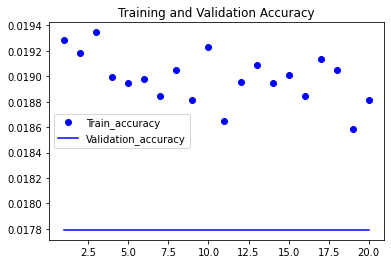

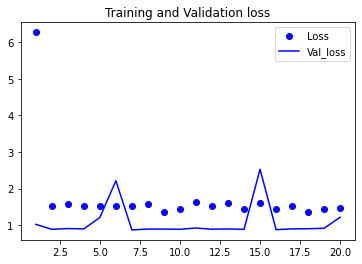

<Figure size 432x288 with 0 Axes>

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)

plt.plot(epochs , acc , 'bo' , label='Train_accuracy')
plt.plot(epochs , val_acc , 'b' ,label='Validation_accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs , loss , 'bo' ,label='Loss')
plt.plot(epochs , val_loss , 'b', label='Val_loss')
plt.title('Training and Validation loss')
plt.legend()

plt.figure()

In [ ]:
# using LSTM
from keras.layers import LSTM , Dropout, Dense
model=Sequential()
model.add(LSTM(32))
model.add(Dropout(0.5))
model.add(Dense(186891, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])
history=model.fit(
    x_train, 
    y_train, 
    batch_size=128,
    epochs=5,
    validation_split=0.2 )




Epoch 1/5


ValueError: ignored

In [ ]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
history=model.fit(
    x_train, 
    y_train, 
    batch_size=64,
    epochs=10,
    validation_split=0.2 )

Epoch 1/10


ValueError: ignored